# 파생변수 만들기

## 변수 조합해 파생변수 만들기
> 파생변수(derived variable)
```
    기본의 변수를 변형해 만든 변수
```

|이름|영어 점수|수학 점수| -  파생변수  -> | 이름  |영어 점수|수학 점수|평균|
|:-:|:-:|:-:|:-----------:|:---:|:-:|:-:|:-:|
|권순영|90|50|             | 권순영 |90|50|70|
|전원우|80|50|             | 전원우 |80|50|70|
|이지훈|60|100|             | 이지훈 |60|100|80|
|서명호|70|20|             | 서명호 |70|20|45|


In [1]:
import pandas as pd

In [2]:
df = pd.DataFrame({'var1':[4, 3, 8], 'var2':[2, 6, 1]})
df

,var1,var2
0,4,2
1,3,6
2,8,1


In [3]:
# var_sum 파생변수 만들기
df['var_sum'] = df['var1'] + df['var2']
df

,var1,var2,var_sum
0,4,2,6
1,3,6,9
2,8,1,9


In [4]:
# var_mean 파생변수 만들기
df['var_mean'] = (df['var1'] + df['var2']) /2
df

,var1,var2,var_sum,var_mean
0,4,2,6,3.0
1,3,6,9,4.5
2,8,1,9,4.5


### mpg 통합 연비 변수 만들기

In [7]:
mpg = pd.read_csv('./input/mpg.csv')
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [8]:
# 통합 연비 변수 만들기
mpg['total'] = (mpg['cty'] + mpg['hwy']) / 2
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [9]:
# total 합계를 행 수로 나누기
sum(mpg['total']) / len(mpg)

20.14957264957265

In [10]:
# 통합 연비 변수 평균
mpg['total'].mean()

20.14957264957265

### 조건문을 활용해 파생변수 만들기

#### 1. 기준값 정하기

In [11]:
mpg['total'].describe()     # 요약 통계량 출력

count    234.000000
mean      20.149573
std        5.050290
min       10.500000
25%       15.500000
50%       20.500000
75%       23.500000
max       39.500000
Name: total, dtype: float64

<Axes: ylabel='Frequency'>

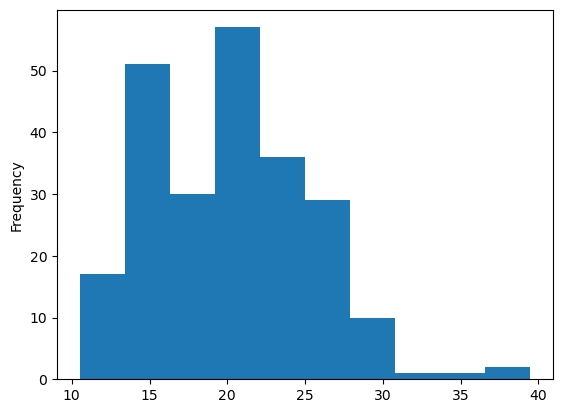

In [12]:
# 그래프 - 히스토그램 만들기
mpg['total'].plot.hist()

#### 2. 합격 판정 변수 만들기
```
    total 변수가 20을 넘으면 합격, 넘지 못하면 불합격으로 분류
```

In [18]:
import numpy as np  # 배열 연산, 통계치 계산 등 수치연산할 때 사용하는 패키지
# where() : 조건에 따라 서로 다른 값을 부여
mpg['test'] = np.where(mpg['total'] >= 20, 'pass', 'fail')
# 조건 : mpg['total'] >= 20
# 조건에 맞을 때 부여 : 'pass'
# 조건에 맞지 않을 때 부여 : 'fail'
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,test
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,pass
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,pass
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,pass
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,pass
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5,pass
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0,pass
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0,pass
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0,pass


#### 3. 빈도표로 합격 판정 자동차 수 살펴보기
> 빈도표
```
    변수의 값이 종류별로 몇 개씩 있는지, 값의 개수를 나타낸 표
```

In [19]:
mpg['test'].value_counts()  # 연비 합격 빈도표 만들기

test
pass    128
fail    106
Name: count, dtype: int64

#### 4. 막대그래프로 빈도 표현하기

<Axes: xlabel='test'>

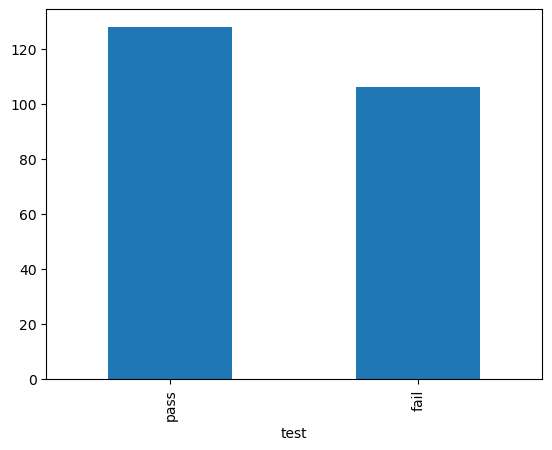

In [21]:
count_test = mpg['test'].value_counts() # 연비 합격 빈도표를 변수에 할당
count_test.plot.bar()   # 연비 합격 빈도 막대 그래프 만들기

<Axes: xlabel='test'>

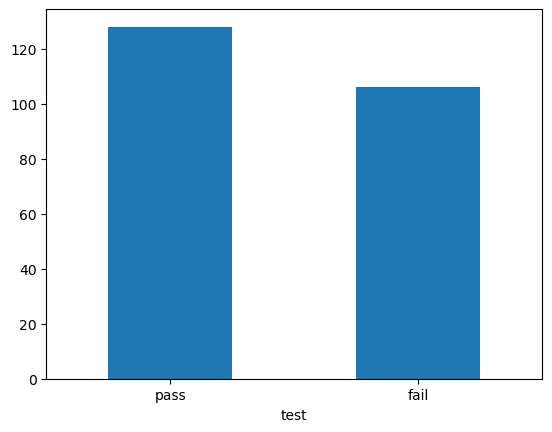

In [22]:
count_test.plot.bar(rot = 0)    # 축 이름 수평으로 만들기

### 중첩 조건문 활용하기

|등급|기준|
|:-:|:-:|
|A|30 이상|
|B|20 ~ 29|
|C|20 미만|

#### 1. 연비 등급 변수

In [24]:
# total 기준으로 A, B, C 등급 부여
mpg['grade'] = np.where(mpg['total'] >= 30, 'A',
                        np.where(mpg['total'] >= 20, 'B', 'C'))
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,test,grade
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,pass,B
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,pass,B
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,pass,B
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,pass,B
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,pass,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5,pass,B
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0,pass,B
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0,pass,B
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0,pass,B


#### 2. 빈도표와 막대 그래프로 연비 등급 살펴보기

In [25]:
# 등급 빈도표
count_grade = mpg['grade'].value_counts()
count_grade

grade
B    118
C    106
A     10
Name: count, dtype: int64

<Axes: xlabel='grade'>

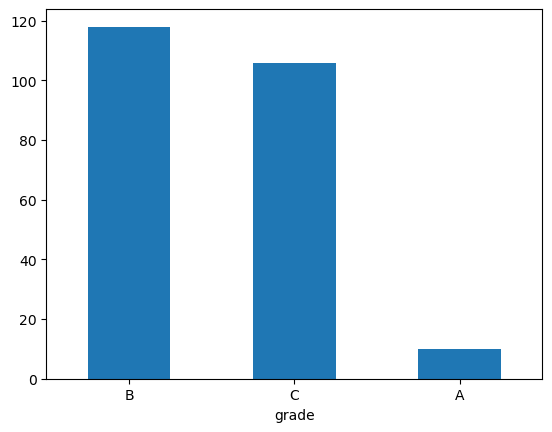

In [26]:
# 등급 빈도 막대 그래프 만들기
count_grade.plot.bar(rot = 0) 

In [27]:
# 등급 빈도표 알파벳순 정렬
count_grade = mpg['grade'].value_counts().sort_index()
count_grade

grade
A     10
B    118
C    106
Name: count, dtype: int64

<Axes: xlabel='grade'>

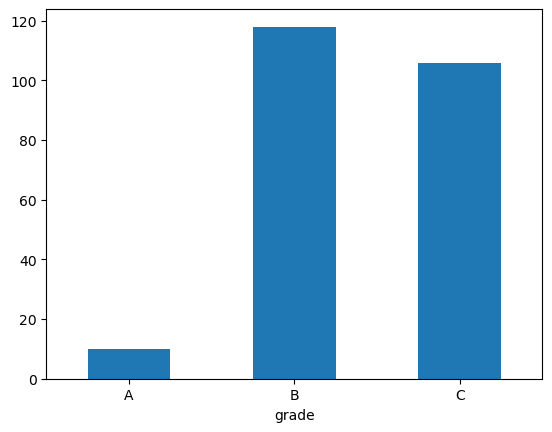

In [28]:
count_grade.plot.bar(rot=0)

In [29]:
# 내림차순으로 정렬
count_grade = mpg['grade'].value_counts().sort_index(ascending=False)
count_grade

grade
C    106
B    118
A     10
Name: count, dtype: int64

#### 필요한 만큼 범주 만들기 : '범주의 수 - 1'

In [34]:
# A, B, C, D 등급 변수 만들기
# np.where()에 여러 조건 입력할 때 각 조건에 괄호 입력 주의
mpg['grade2'] = np.where(mpg['total'] >= 30, 'A',
                np.where(mpg['total'] >= 25, 'B', 
                np.where(mpg['total'] >=20, 'C', 'D')))
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,test,grade,grade2
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,pass,B,C
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,pass,B,B
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,pass,B,B
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,pass,B,B
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,pass,B,C


In [33]:
count_grade2 = mpg['grade2'].value_counts().sort_index()
count_grade2

grade2
A     10
B     33
C     85
D    106
Name: count, dtype: int64

In [35]:
mpg['category'].value_counts()

category
suv           62
compact       47
midsize       41
subcompact    35
pickup        33
minivan       11
2seater        5
Name: count, dtype: int64

### 목록에 해당하는 행으로 변수 만들기
```
    - | : 버티컬 바(vertical bar)
        - '또는(or)'을 의미하는 기호
        - [Shift] + [\]로 입력
```

In [36]:
mpg['size'] = np.where((mpg['category'] == 'compact') | 
                       (mpg['category']  == 'subcompact') | 
                       (mpg['category'] == '2seater'), 'small', 'large')
mpg['size'].value_counts()

size
large    147
small     87
Name: count, dtype: int64

#### 다른 방법 : df.isin() 사용

In [37]:
mpg['size'] = np.where(mpg['category'].isin(['compact', 'subcompact', '2seater']), 'small', 'large')
mpg['size'].value_counts()

size
large    147
small     87
Name: count, dtype: int64

## 분석 도전
```
    midwest.csv는 미국 동북중부 437개 지역의 인구통계 정보를 담고 있음
    midwest.csv를 이용해 데이서 문석 문제 해결
```

### Q1. midwest.csv를 불러와 데이터의 특징 파악

In [38]:
import pandas as pd

In [39]:
midwest = pd.read_csv('./input/midwest.csv')    # midwest 데이터 불러오기
midwest.head()  # 앞부분 출력

,PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,...,percollege,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category
0,561,ADAMS,IL,0.052,66090,1270.961540,63917,1702,98,249,...,19.631392,4.355859,63628,96.274777,13.151443,18.011717,11.009776,12.443812,0,AAR
1,562,ALEXANDER,IL,0.014,10626,759.000000,7054,3496,19,48,...,11.243308,2.870315,10529,99.087145,32.244278,45.826514,27.385647,25.228976,0,LHR
2,563,BOND,IL,0.022,14991,681.409091,14477,429,35,16,...,17.033819,4.488572,14235,94.956974,12.068844,14.036061,10.852090,12.697410,0,AAR
3,564,BOONE,IL,0.017,30806,1812.117650,29344,127,46,150,...,17.278954,4.197800,30337,98.477569,7.209019,11.179536,5.536013,6.217047,1,ALU
4,565,BROWN,IL,0.018,5836,324.222222,5264,547,14,5,...,14.475999,3.367680,4815,82.505140,13.520249,13.022889,11.143211,19.200000,0,AAR


In [40]:
midwest.tail()  # 뒷부분 출력

,PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,...,percollege,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category
432,3048,WAUKESHA,WI,0.034,304715,8962.205880,298313,1096,672,2699,...,35.396784,7.667090,299802,98.387674,3.121060,3.785820,2.590061,4.085479,1,HLU
433,3049,WAUPACA,WI,0.045,46104,1024.533330,45695,22,125,92,...,16.549869,3.138596,44412,96.330036,8.488697,10.071411,6.953799,10.338641,0,AAR
434,3050,WAUSHARA,WI,0.037,19385,523.918919,19094,29,70,43,...,15.064584,2.620907,19163,98.854785,13.786985,20.050708,11.695784,11.804558,0,AAR
435,3051,WINNEBAGO,WI,0.035,140320,4009.142860,136822,697,685,1728,...,24.995504,5.659847,133950,95.460376,8.804031,10.592031,8.660587,6.661094,1,HAU
436,3052,WOOD,WI,0.048,73605,1533.437500,72157,90,481,722,...,21.666382,4.583725,72685,98.750085,8.525831,11.162997,7.375656,7.882918,0,AAR


In [41]:
midwest.shape   # 행, 열 개수 출력

(437, 28)

In [42]:
midwest.info()  # 변수 속성 출력

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PID                   437 non-null    int64  
 1   county                437 non-null    object 
 2   state                 437 non-null    object 
 3   area                  437 non-null    float64
 4   poptotal              437 non-null    int64  
 5   popdensity            437 non-null    float64
 6   popwhite              437 non-null    int64  
 7   popblack              437 non-null    int64  
 8   popamerindian         437 non-null    int64  
 9   popasian              437 non-null    int64  
 10  popother              437 non-null    int64  
 11  percwhite             437 non-null    float64
 12  percblack             437 non-null    float64
 13  percamerindan         437 non-null    float64
 14  percasian             437 non-null    float64
 15  percother             4

In [43]:
midwest.describe()  # 요약 통계량 출력

,PID,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,popother,percwhite,...,perchsd,percollege,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro
count,437.000000,437.000000,4.370000e+02,437.000000,4.370000e+02,4.370000e+02,437.000000,437.000000,437.000000,437.000000,...,437.000000,437.000000,437.000000,4.370000e+02,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000
mean,1437.338673,0.033169,9.613030e+04,3097.742985,8.183992e+04,1.102388e+04,343.109840,1310.464531,1612.931350,95.558441,...,73.965546,18.272736,4.447259,9.364228e+04,97.110267,12.510505,16.447464,10.918798,11.389043,0.343249
std,876.390266,0.014679,2.981705e+05,7664.751786,2.001966e+05,7.895827e+04,868.926751,9518.394189,18526.540699,7.087358,...,5.843177,6.261908,2.408427,2.932351e+05,2.749863,5.150155,7.228634,5.109166,3.661259,0.475338
min,561.000000,0.005000,1.701000e+03,85.050000,4.160000e+02,0.000000e+00,4.000000,0.000000,0.000000,10.694087,...,46.912261,7.336108,0.520291,1.696000e+03,80.902441,2.180168,1.918955,1.938504,3.547067,0.000000
25%,670.000000,0.024000,1.884000e+04,622.407407,1.863000e+04,2.900000e+01,44.000000,35.000000,20.000000,94.886032,...,71.325329,14.113725,2.997957,1.836400e+04,96.894572,9.198715,11.624088,7.668009,8.911763,0.000000
50%,1221.000000,0.030000,3.532400e+04,1156.208330,3.447100e+04,2.010000e+02,94.000000,102.000000,66.000000,98.032742,...,74.246891,16.797562,3.814239,3.378800e+04,98.169562,11.822313,15.270164,10.007610,10.869119,0.000000
75%,2059.000000,0.038000,7.565100e+04,2330.000000,7.296800e+04,1.291000e+03,288.000000,401.000000,345.000000,99.074935,...,77.195345,20.549893,4.949324,7.284000e+04,98.598636,15.133226,20.351878,13.182182,13.412162,1.000000
max,3052.000000,0.110000,5.105067e+06,88018.396600,3.204947e+06,1.317147e+06,10289.000000,188565.000000,384119.000000,99.822821,...,88.898674,48.078510,20.791321,5.023523e+06,99.860384,48.691099,64.308477,43.312464,31.161972,1.000000


### Q2. poptotal(전체 인구) 를 total로, popasian(아시아 인구) 변수를 asian으로 수정

In [44]:
# 변수 이름 수정을 위해 복사본 생성
midwest_new = midwest.copy()
midwest_new.head()  # 앞부분 출력

,PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,...,percollege,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category
0,561,ADAMS,IL,0.052,66090,1270.961540,63917,1702,98,249,...,19.631392,4.355859,63628,96.274777,13.151443,18.011717,11.009776,12.443812,0,AAR
1,562,ALEXANDER,IL,0.014,10626,759.000000,7054,3496,19,48,...,11.243308,2.870315,10529,99.087145,32.244278,45.826514,27.385647,25.228976,0,LHR
2,563,BOND,IL,0.022,14991,681.409091,14477,429,35,16,...,17.033819,4.488572,14235,94.956974,12.068844,14.036061,10.852090,12.697410,0,AAR
3,564,BOONE,IL,0.017,30806,1812.117650,29344,127,46,150,...,17.278954,4.197800,30337,98.477569,7.209019,11.179536,5.536013,6.217047,1,ALU
4,565,BROWN,IL,0.018,5836,324.222222,5264,547,14,5,...,14.475999,3.367680,4815,82.505140,13.520249,13.022889,11.143211,19.200000,0,AAR


In [46]:
midwest_new = midwest_new.rename(columns={'poptotal':'total', 'popasian':'asian'})
midwest_new.head()

,PID,county,state,area,total,popdensity,popwhite,popblack,popamerindian,asian,...,percollege,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category
0,561,ADAMS,IL,0.052,66090,1270.961540,63917,1702,98,249,...,19.631392,4.355859,63628,96.274777,13.151443,18.011717,11.009776,12.443812,0,AAR
1,562,ALEXANDER,IL,0.014,10626,759.000000,7054,3496,19,48,...,11.243308,2.870315,10529,99.087145,32.244278,45.826514,27.385647,25.228976,0,LHR
2,563,BOND,IL,0.022,14991,681.409091,14477,429,35,16,...,17.033819,4.488572,14235,94.956974,12.068844,14.036061,10.852090,12.697410,0,AAR
3,564,BOONE,IL,0.017,30806,1812.117650,29344,127,46,150,...,17.278954,4.197800,30337,98.477569,7.209019,11.179536,5.536013,6.217047,1,ALU
4,565,BROWN,IL,0.018,5836,324.222222,5264,547,14,5,...,14.475999,3.367680,4815,82.505140,13.520249,13.022889,11.143211,19.200000,0,AAR


### Q3. total, asian 변수를 이용해 '전체 인구 대비 아시아 인구 백분율' 파생변수를 추가하고, 히스토그램을 만들어 분포 살펴보기

<Axes: ylabel='Frequency'>

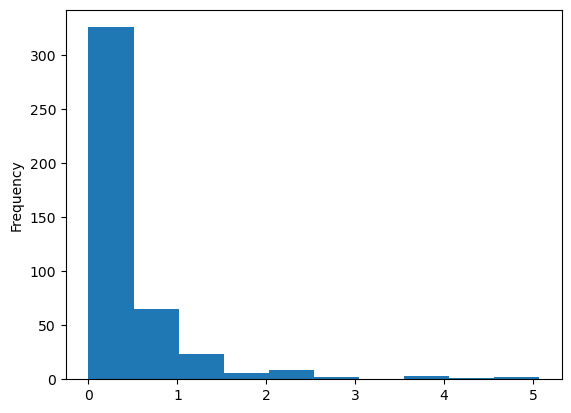

In [47]:
# 백분율 변수 추가
midwest_new['ratio'] = midwest_new['asian'] / midwest_new['total'] * 100

# 히스토그램 만들기
midwest_new['ratio'].plot.hist()

### Q4. 아시아 인구 백분율 전체 평균을 구하고, 평균을 초과하면 'large', 그 외에는 'small'을 부여한 파생변수 생성

In [51]:
# ratio 평균
mean = midwest_new['ratio'].mean()
mean

0.4872461834357345

In [56]:
# large, small 부여
midwest_new['group'] = np.where(midwest_new['ratio'] > mean, 'large', 'small')
midwest_new['group']

0      small
1      small
2      small
3      small
4      small
       ...  
432    large
433    small
434    small
435    large
436    large
Name: group, Length: 437, dtype: object

### Q5. 'large'와 'small'에 해당하는 지역이 얼마나 많은지 빈도표와 빈도 막대 그래프를 만들어 확인

In [54]:
# group 빈도 구하기
count_midwest = midwest_new['group'].value_counts()
count_midwest

group
small    318
large    119
Name: count, dtype: int64

<Axes: xlabel='group'>

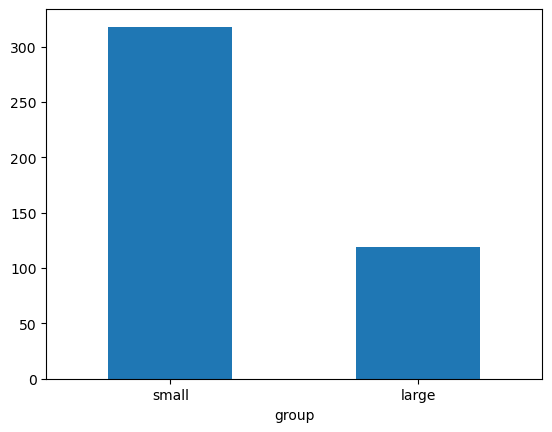

In [60]:
# 막대 그래프 만들기
count_midwest.plot.bar(rot = 0)

# 데이터 전처리(data preprocessing) : 자유자재로 데이터 가공하기
```
    - 분석에 적합하게 데이터를 가공하는 작업
    - pandas : 전처리 작업에 가장 많이 사용되는 패키지
```

<br>

## 조건에 맞는 데이터만 추출하기

In [61]:
import pandas as pd
exam = pd.read_csv('./input/exam.csv')
exam

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45


In [62]:
# nclass가 1인 경우만 추출
exam.query('nclass == 1')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58


In [63]:
# nclass가 2인 경우만 추출
exam.query('nclass == 2')

,id,nclass,math,english,science
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25


In [64]:
# 1반이 아닌 경우
exam.query('nclass != 1')   # != 아니다, == 같다

,id,nclass,math,english,science
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
12,13,4,46,98,65
13,14,4,48,87,12


In [65]:
# 3반이 아닌 경우
exam.query('nclass != 3')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
12,13,4,46,98,65
13,14,4,48,87,12


### 초과, 미만, 이상, 이하 조건 걸기

In [66]:
# 수학 점수가 50을 초과한 경우
exam.query('math > 50')

,id,nclass,math,english,science
1,2,1,60,97,60
6,7,2,80,90,45
7,8,2,90,78,25
10,11,3,65,65,65
14,15,4,75,56,78
15,16,4,58,98,65
16,17,5,65,68,98
17,18,5,80,78,90
18,19,5,89,68,87
19,20,5,78,83,58


In [67]:
# 수학 점수가 50점 미만인 경우
exam.query('math < 50')

,id,nclass,math,english,science
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65
8,9,3,20,98,15
11,12,3,45,85,32
12,13,4,46,98,65
13,14,4,48,87,12


In [68]:
# 영어 점수가 50점 이상인 경우
exam.query('english >= 50')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45


In [69]:
# 영어 점수가 80점 이하인 경우
exam.query('english <= 80')

,id,nclass,math,english,science
4,5,2,25,80,65
7,8,2,90,78,25
10,11,3,65,65,65
14,15,4,75,56,78
16,17,5,65,68,98
17,18,5,80,78,90
18,19,5,89,68,87


### 여러 조건을 충족하는 행 추출하기

In [70]:
# 1반이면서 수학 점수가 50점 이상인 경우
exam.query('nclass == 1 & math >= 50')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60


In [71]:
# 2반이면서 영어 점수가 80점 이상인 경우
exam.query('nclass == 2 & english >= 80')

,id,nclass,math,english,science
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45


### 여러 조건 중 하나 이상 충족하는 행 추출하기

In [72]:
# 수학 점수가 90점 이상이거나 영어 점수가 90점 이상인 경우
exam.query('math >= 90 | english >= 90')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
3,4,1,30,98,58
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45
12,13,4,46,98,65
15,16,4,58,98,65


In [73]:
# 영어 점수가 90점 미만이거나 과학 점수가 50점 미만인 경우
exam.query('english < 90 | science < 50')

,id,nclass,math,english,science
2,3,1,45,86,78
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
13,14,4,48,87,12


### 목록에 해당하는 행 추출하기

In [74]:
# 1, 3, 5반에 해당하면 추출 - 첫번째 방법
exam.query('nclass == 1 | nclass == 3 | nclass == 5')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
16,17,5,65,68,98
17,18,5,80,78,90


In [79]:
# 1, 3, 5반에 해당하는 것 추출 - 두번째 방법
exam.query('nclass in [1, 3, 5]')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
16,17,5,65,68,98
17,18,5,80,78,90


### 추출한 행으로 데이터 만들기

In [75]:
# nclass가 1인 행 추출해 nclass1에 할당
nclass1 = exam.query('nclass == 1')

In [76]:
# nclass가 2인 행 추출해 nclass2에 할당
nclass2 = exam.query('nclass == 2')

In [77]:
# 1반 수학 점수 평균 구하기
nclass1['math'].mean()

46.25

In [78]:
# 2반 수학 점수 평균 구하기
nclass2['math'].mean()

61.25